In [1]:
pwd

'C:\\Users\\user\\OneDrive\\Desktop\\scatter-plotter'

In [2]:
cd C:\\Users\\user\\OneDrive\\Desktop\\CSV files

C:\Users\user\OneDrive\Desktop\CSV files


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv('african_crises.csv')
data.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
case                               1059 non-null int64
cc3                                1059 non-null object
country                            1059 non-null object
year                               1059 non-null int64
systemic_crisis                    1059 non-null int64
exch_usd                           1059 non-null float64
domestic_debt_in_default           1059 non-null int64
sovereign_external_debt_default    1059 non-null int64
gdp_weighted_default               1059 non-null float64
inflation_annual_cpi               1059 non-null float64
independence                       1059 non-null int64
currency_crises                    1059 non-null int64
inflation_crises                   1059 non-null int64
banking_crisis                     1059 non-null object
dtypes: float64(3), int64(8), object(3)
memory usage: 116.0+ KB


In [6]:
x=data.drop(['banking_crisis','cc3','gdp_weighted_default'],axis=1)
x

,case,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
0,1,Algeria,1870,1,0.052264,0,0,3.441456,0,0,0
1,1,Algeria,1871,0,0.052798,0,0,14.149140,0,0,0
2,1,Algeria,1872,0,0.052274,0,0,-3.718593,0,0,0
3,1,Algeria,1873,0,0.051680,0,0,11.203897,0,0,0
4,1,Algeria,1874,0,0.051308,0,0,-3.848561,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1054,70,Zimbabwe,2009,1,354.800000,1,1,-7.670000,1,1,0
1055,70,Zimbabwe,2010,0,378.200000,1,1,3.217000,1,0,0
1056,70,Zimbabwe,2011,0,361.900000,1,1,4.920000,1,0,0
1057,70,Zimbabwe,2012,0,361.900000,1,1,3.720000,1,0,0


In [7]:
y=data.iloc[:,13]
y

0          crisis
1       no_crisis
2       no_crisis
3       no_crisis
4       no_crisis
          ...    
1054       crisis
1055    no_crisis
1056    no_crisis
1057    no_crisis
1058    no_crisis
Name: banking_crisis, Length: 1059, dtype: object

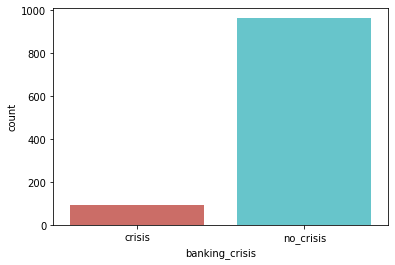

In [8]:
sns.countplot(x=y,data=data,palette='hls')
plt.show()

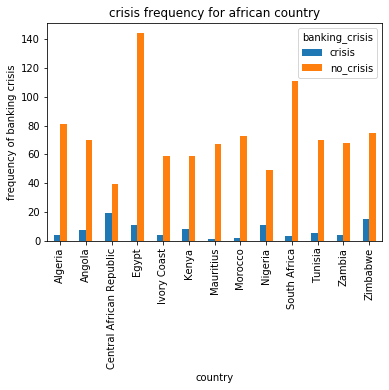

In [9]:
pd.crosstab(x.country,y).plot(kind='bar')
plt.title('crisis frequency for african country')
plt.xlabel('country')
plt.ylabel('frequency of banking crisis')
plt.show()

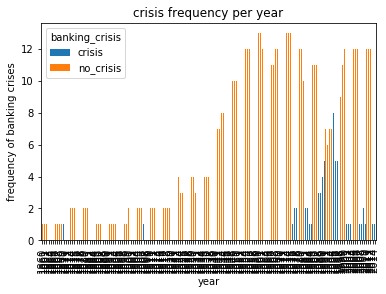

In [10]:
pd.crosstab(x.year,y).plot(kind='bar')
plt.title('crisis frequency per year')
plt.xlabel('year')
plt.ylabel('frequency of banking crises')
plt.show()

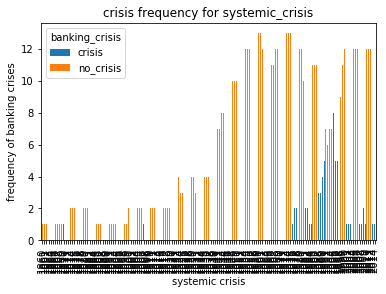

In [11]:
pd.crosstab(x.year,y).plot(kind='bar')
plt.title('crisis frequency for systemic_crisis')
plt.xlabel('systemic crisis')
plt.ylabel('frequency of banking crises')
plt.show()

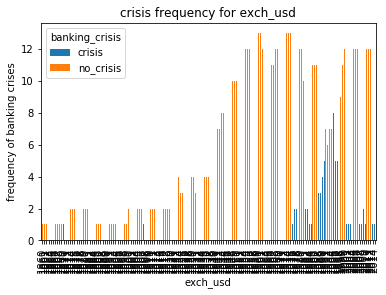

In [12]:
pd.crosstab(x.year,y).plot(kind='bar')
plt.title('crisis frequency for exch_usd')
plt.xlabel('exch_usd')
plt.ylabel('frequency of banking crises')
plt.show()

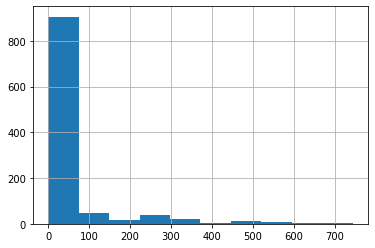

In [13]:
x.exch_usd.hist()

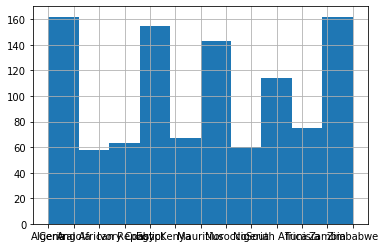

In [14]:
x.country.hist()


In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['country']=le.fit_transform(x['country'])
y=le.fit_transform(y)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)
y_test

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_trainmin=mms.fit_transform(x_train)
                         
x_testmin=mms.transform(x_test)

In [18]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_trainstd=ss.fit_transform(x_train)
x_teststd=ss.transform(x_test)

# LOGISTIC REGRESSION

In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred1=lr.predict(x_test)
pred1

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_test,pred1))

accuracy is 0.9811320754716981


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_trainmin,y_train)
pred2=lr.predict(x_testmin)
pred2

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_test,pred2))

accuracy is 0.9716981132075472


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_trainstd,y_train)
pred3=lr.predict(x_teststd)
pred3

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_test,pred3))

accuracy is 0.9764150943396226


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
